<a href="https://colab.research.google.com/github/amritha-dev/CodSoft/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SALES PREDICTION USING PYTHON**

In [ ]:
# Importing libraries:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CodSoft/advertising.csv")

Shape of Dataset:

In [ ]:
df.shape

(200, 4)

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


Statistical values:

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# to check null values
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


Data Information:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


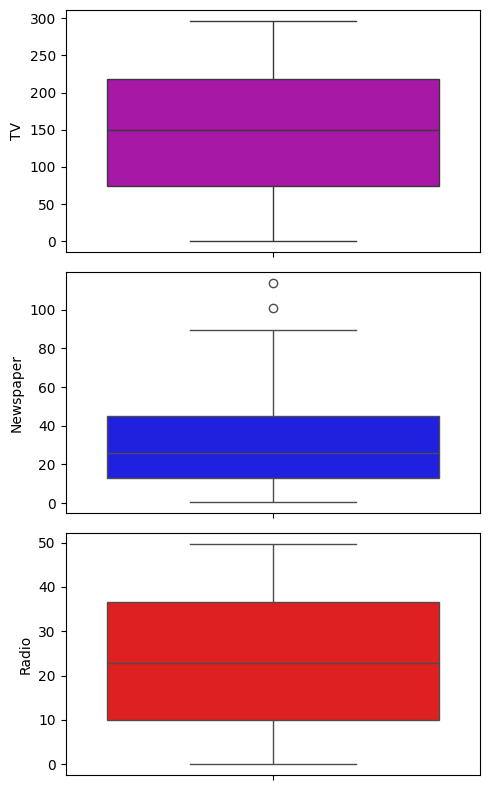

In [ ]:
fig, axs = plt.subplots(3, figsize=(5, 8))
plt1 = sns.boxplot(df['TV'], ax=axs[0], color='m')
plt2 = sns.boxplot(df['Newspaper'], ax=axs[1], color='b')
plt3 = sns.boxplot(df['Radio'], ax=axs[2], color='r')
plt.tight_layout()

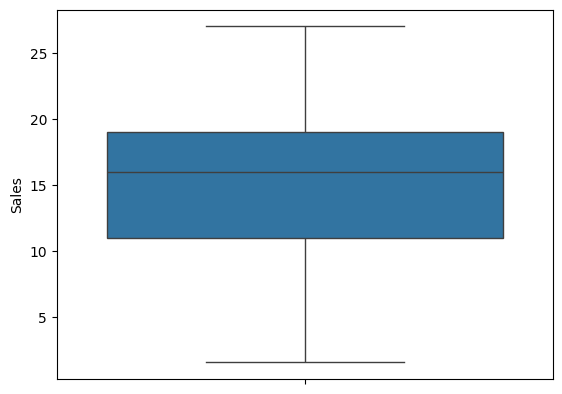

In [ ]:
sns.boxplot(df['Sales'])
plt.show()

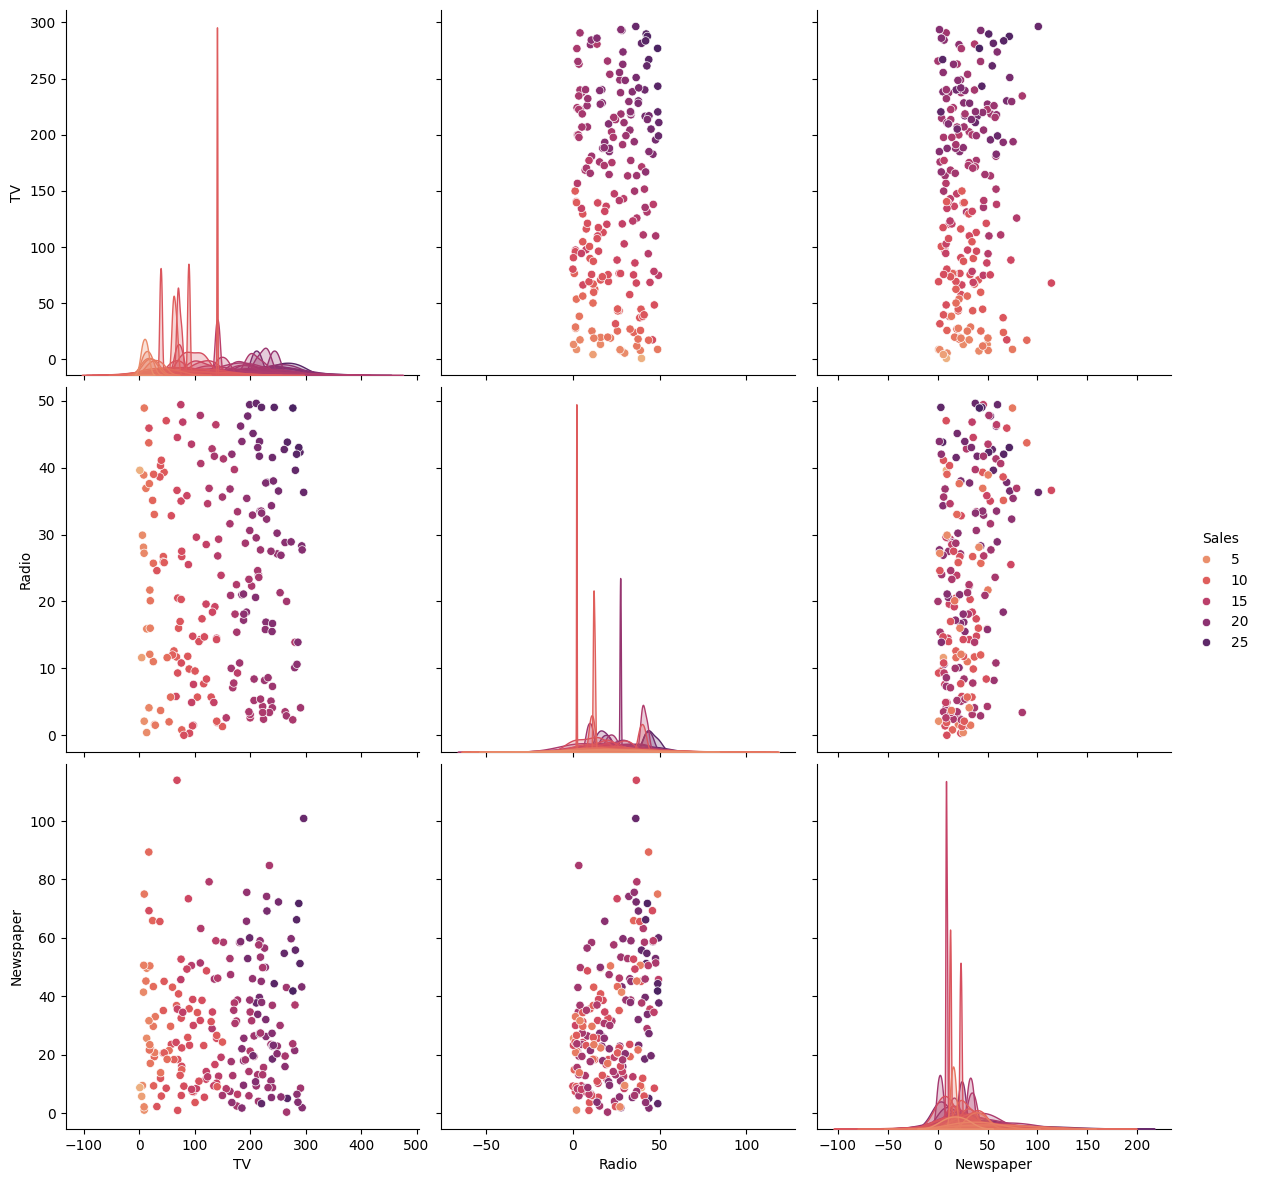

In [ ]:
sns.pairplot(df, kind = 'scatter', aspect = 1, height = 4, palette = 'flare', hue='Sales')

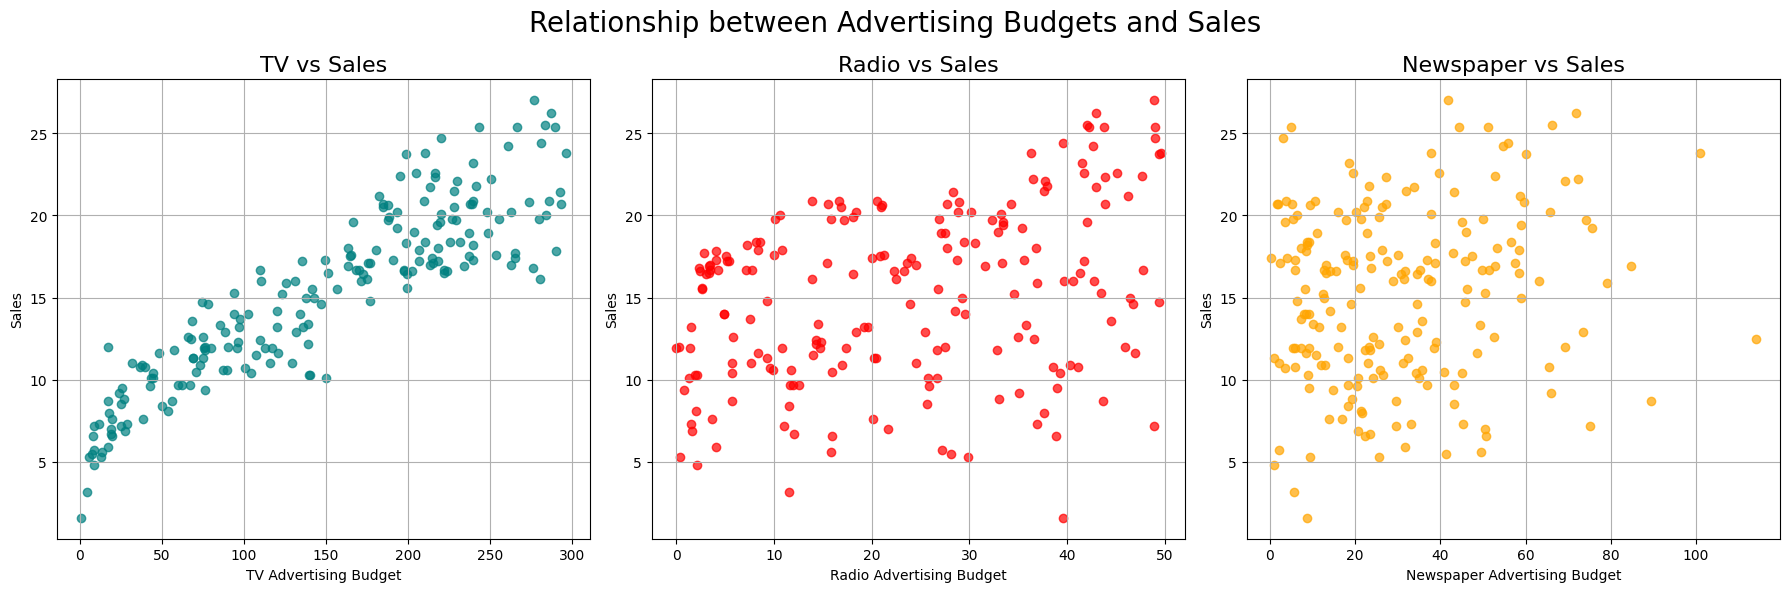

In [ ]:
# Plot relationship between variables

plt.figure(figsize=(18,6))

# TV vs Sales
plt.subplot(1,3,1)
plt.scatter(df['TV'],df['Sales'], alpha=0.7, color='teal')
plt.title('TV vs Sales', fontsize=16)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)


# Radio Vs Sales
plt.subplot(1,3,2)
plt.scatter(df['Radio'],df['Sales'], alpha=0.7, color='red')
plt.title('Radio vs Sales', fontsize=16)
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)

# Newspaper Vs Sales
plt.subplot(1,3,3)
plt.scatter(df['Newspaper'],df['Sales'], alpha=0.7, color='orange')
plt.title('Newspaper vs Sales', fontsize=16)
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)

plt.suptitle('Relationship between Advertising Budgets and Sales', fontsize=20)

plt.tight_layout()
plt.show();

<ipython-input-14-4ff15fd38c13>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=avg_spend.index, y=avg_spend.values,palette=colors, linewidth=0)


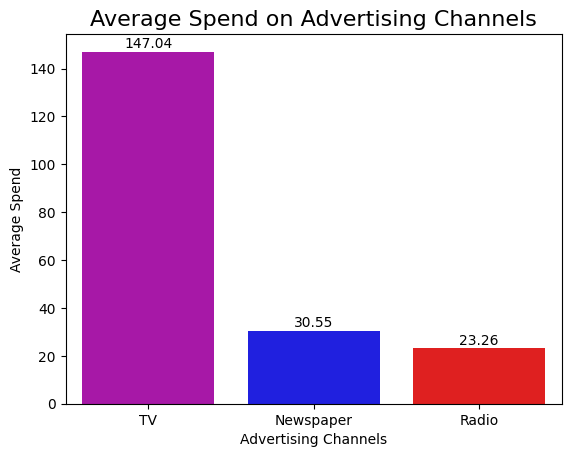

In [ ]:
#Average spend on advertising
avg_spend = df[['TV','Newspaper','Radio']].mean()

colors = ['m','b','r']

ax=sns.barplot(x=avg_spend.index, y=avg_spend.values,palette=colors, linewidth=0)

for i, v in enumerate(avg_spend.values):
    ax.text(i,v + 0.2, f'{v:.2f}', va='bottom',ha='center')


plt.title('Average Spend on Advertising Channels', fontsize=16)
plt.xlabel('Advertising Channels', fontsize=10)
plt.ylabel('Average Spend', fontsize=10)
ax.yaxis.grid(False)
plt.show()

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


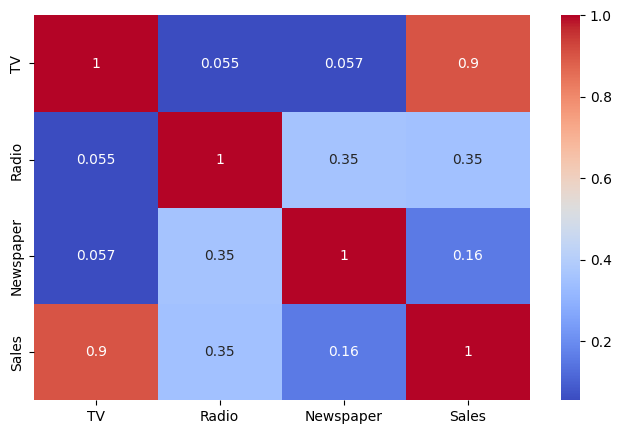

In [ ]:
# Visualizing correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap="coolwarm", annot = True)
plt.show()

Split the data

In [ ]:
X = df[["TV", "Radio", "Newspaper"]]
y = df[['Sales']]

In [ ]:
print(X.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4


In [ ]:
print(y.head())

   Sales
0   22.1
1   10.4
2   12.0
3   16.5
4   17.9


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
#Fit model
linear = LinearRegression()
linear.fit(X_train, y_train)

#Coefficient for all advertising media
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear.coef_[0][idx]))

The coefficient for TV is 0.05450927083721978
The coefficient for Radio is 0.10094536239295579
The coefficient for Newspaper is 0.0043366468220340446


In [ ]:
intercept = linear.intercept_[0]
print("The intercept for our linear model is {}".format(intercept))

The intercept for our linear model is 4.714126402214127


In [ ]:

#Predict the model
y_pred_train_linear = linear.predict(X_train)
y_pred_test_linear = linear.predict(X_test)

In [ ]:
#Evaluate the model on the test data
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_linear))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_linear)/100)
linear_mse = metrics.mean_squared_error(y_test, y_pred_test_linear)
print("Mean Square Error (MSE) :", linear_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_linear)))
r_squared_train_linear = r2_score(y_train, y_pred_train_linear)
r_squared_test_linear = r2_score(y_test, y_pred_test_linear)
print("R-squared Score (Train) :", r_squared_train_linear)
print("R-squared Score (Test) :", r_squared_test_linear)


Mean Absolute Error (MAE) : 1.2748262109549338
Mean Absolute Percent Error (MAPE) : 0.012748262109549338
Mean Square Error (MSE) : 2.9077569102710896
Root Mean Square Error (RMSE) : 1.7052146229349223
R-squared Score (Train) : 0.9001416005862131
R-squared Score (Test) : 0.9059011844150826


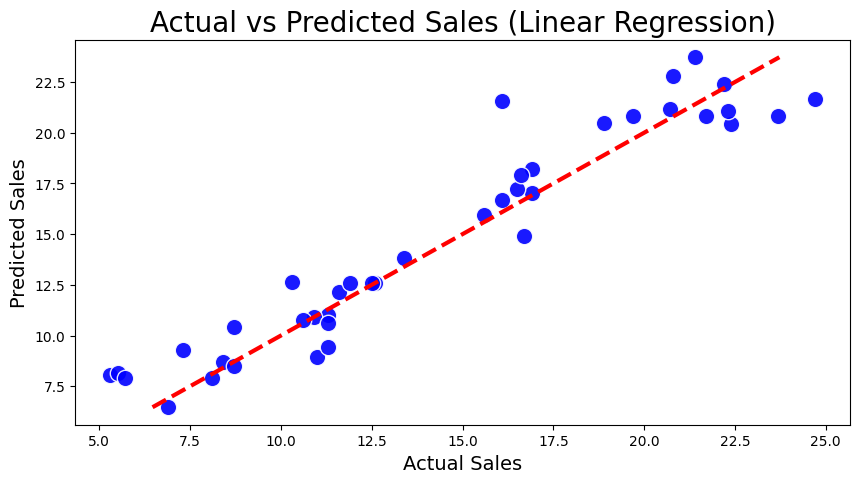

In [ ]:
# Visualize Predicted Vs Actual Values

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_linear, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_linear), max(y_pred_test_linear)], [min(y_pred_test_linear), max(y_pred_test_linear)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Linear Regression)', fontsize=20);

Conclusion:
In analyzing the Sales Prediction Dataset, I navigated through data visualization, preprocessing, and machine learning model selection.The characteristics of the dataset, including the nature of relationships and noise, influence model performance.